In [1]:
import sxs 
import qnmfits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open("waveforms_used.txt", "r") as file:
    waveform_ids = file.readlines()
waveform_ids = [line.strip() for line in waveform_ids]
waveform_ids = [wf.split(':')[-1][-4:] for wf in waveform_ids]

sims = {}
for wf in waveform_ids:
    try:
        sims[wf] = qnmfits.SXS(ID=wf, zero_time=(2,2))
    except Exception as e:
        print(f"Error processing waveform ID {wf}: {e}")

Found the following files to load from the SXS catalog:
    SXS:BBH:0219v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0219v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0226v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0226v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0221v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0221v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0225v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0225v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0224v5/Lev5/metadata.json
Found the following files to load from the SXS

  0%|          | 0/72482012 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0155v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0155v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/104338353 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0151v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0151v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/74433114 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0172v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0172v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/112868024 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0156v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0156v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/27685972 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0216v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0216v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95588769 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0214v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0214v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96596802 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0227v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0227v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96906416 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0229v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0229v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/97807255 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0222v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0222v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96159581 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0223v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0223v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96587105 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0209v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0209v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/101317792 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0210v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0210v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96014267 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0232v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0232v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/102370710 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0231v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0231v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/99163540 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0005v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0005v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/151034883 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0004v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0004v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/158296692 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0622v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0622v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/85288504 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0306v6/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0306v6/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/68433281 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0019v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0019v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/109133591 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0025v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0025v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/118558522 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0007v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0007v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/141172492 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0016v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0016v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/157929882 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0013v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0013v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/119185381 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0239v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0239v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93076590 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0252v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0252v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93740518 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0248v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0248v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96392958 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0258v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0258v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98429023 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0243v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0243v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/94658856 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0257v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0257v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/106339765 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0234v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0234v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/102286857 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0233v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0233v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/91755230 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0246v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0246v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96427565 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0245v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0245v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95544317 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0256v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0256v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/101207121 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0253v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0253v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/113016105 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0255v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0255v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/99342421 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0238v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0238v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/114352749 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0236v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0236v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93861650 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0244v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0244v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95271410 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0235v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0235v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/97319458 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0237v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0237v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/92861607 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0247v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0247v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/94254156 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0251v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0251v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98545509 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0249v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0249v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96486767 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0242v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0242v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95122836 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0240v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0240v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95351128 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0254v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0254v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/97186423 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0169v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0169v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/80583605 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0241v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0241v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95101393 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0250v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0250v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/97604285 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0574v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0574v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/88579673 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0259v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0259v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/107979727 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0261v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0261v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/90183697 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0280v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0280v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/99086995 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0292v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0292v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98111908 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0274v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0274v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93855412 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0279v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0279v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95059843 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0293v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0293v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/108900935 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0273v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0273v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93580679 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0260v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0260v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98379124 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0263v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0263v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/91512854 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0268v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0268v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/92500004 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0269v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0269v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/92592579 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0277v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0277v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95611460 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0276v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0276v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95631641 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0284v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0284v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96637242 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0046v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0046v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/83951931 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0045v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0045v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/100797418 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0047v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0047v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/108486743 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0278v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0278v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95427141 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0287v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0287v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98754307 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0286v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0286v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/100148386 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0275v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0275v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/94082612 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0267v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0267v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/95697910 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0264v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0264v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93369395 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0283v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0283v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98019657 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0281v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0281v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/96899186 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0272v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0272v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/94221807 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0270v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0270v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/94191601 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0265v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0265v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93583444 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0290v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0290v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/102119742 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0285v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0285v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/99736187 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0262v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0262v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/91575313 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0291v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0291v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/103306364 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0030v6/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0030v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/90121332 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0288v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0288v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/98637088 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0266v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0266v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/91362843 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0271v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0271v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/93705522 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0282v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0282v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/97341116 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0289v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0289v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/99736308 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0036v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0036v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/158412146 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0174v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0174v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/161213786 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0167v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0167v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/78875197 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0295v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0295v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/107036459 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0056v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0056v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/125264380 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0061v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0061v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/142060006 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0060v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0060v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/111590392 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0296v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0296v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/107264958 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0166v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0166v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/90365571 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0297v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0297v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/88300416 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0202v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0202v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/180283992 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0298v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0298v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/87926776 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0207v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0207v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/119067316 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0205v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0205v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/141226985 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0204v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0204v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/234383520 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0206v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0206v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/200550463 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0203v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0203v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/173556121 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0299v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0299v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/88604013 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0063v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0063v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/107254624 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0065v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0065v5/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/129951550 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0064v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0064v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/91492630 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0300v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0300v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/86128294 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0301v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0301v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/86793118 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0302v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0302v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/87058751 [00:00<?, ?it/s]

Found the following files to load from the SXS catalog:
    SXS:BBH:0303v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0303v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/87505958 [00:00<?, ?it/s]

In [4]:
C_ratio_33_list = []
C_phase_diff_33_list = []

C_ratio_21_list = []
C_phase_diff_21_list = []

C_ratio_44_list = []
C_phase_diff_44_list = []

In [5]:
for sim in sims.values():

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[2,2],
        [(2,2,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0
    )

    C_mag_22 = np.sqrt(best_fit['C'][0].real**2 + best_fit['C'][0].imag**2)
    C_phase_22 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[3,3],
        [(3,3,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0
    )

    C_mag_33 = np.sqrt(best_fit['C'][0].real**2 + best_fit['C'][0].imag**2)
    C_phase_33 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[2,1],
        [(2,1,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0
    )

    C_mag_21 = np.sqrt(best_fit['C'][0].real**2 + best_fit['C'][0].imag**2)
    C_phase_21 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        [(4,4,0,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0
    )

    C_mag_44 = np.sqrt(best_fit['C'][0].real**2 + best_fit['C'][0].imag**2)
    C_phase_44 = np.arctan2(best_fit['C'][0].imag, best_fit['C'][0].real)

    ### 

    C_ratio_33 = C_mag_33 / C_mag_22
    C_phase_diff_33 = (3/2)*C_phase_22 - C_phase_33

    C_ratio_33_list.append(C_ratio_33)
    C_phase_diff_33_list.append(C_phase_diff_33)

    C_ratio_21 = C_mag_21 / C_mag_22
    C_phase_diff_21 = (1/2)*C_phase_22 - C_phase_21

    C_ratio_21_list.append(C_ratio_21)
    C_phase_diff_21_list.append(C_phase_diff_21)

    C_ratio_44 = C_mag_44 / C_mag_22
    C_phase_diff_44 = (4/2)*C_phase_22 - C_phase_44

    C_ratio_44_list.append(C_ratio_44)
    C_phase_diff_44_list.append(C_phase_diff_44)

/tmp/ipykernel_2153069/3617562546.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


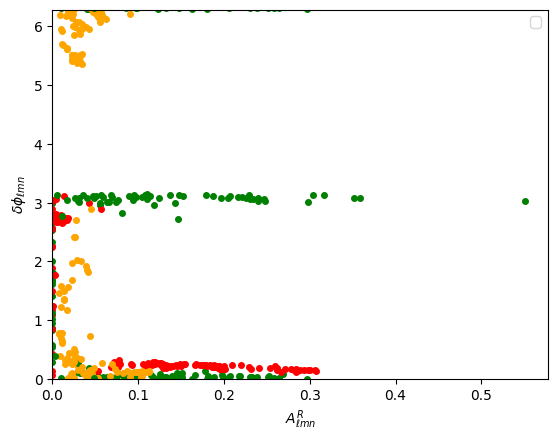

In [6]:
fig, ax = plt.subplots()

for i, wf in enumerate(sims.keys()):
    ax.plot(C_ratio_33_list[i], np.mod(C_phase_diff_33_list[i], np.pi), 'o', markersize=4, color='red')
    ax.plot(C_ratio_33_list[i], np.mod(C_phase_diff_33_list[i], np.pi) + 2*np.pi, 'o', markersize=4, color='red')
    ax.plot(C_ratio_21_list[i], np.mod(C_phase_diff_21_list[i], np.pi), 'o', markersize=4, color='green')
    ax.plot(C_ratio_21_list[i], np.mod(C_phase_diff_21_list[i], np.pi) + 2*np.pi, 'o', markersize=4, color='green')
    ax.plot(C_ratio_44_list[i], np.mod(C_phase_diff_44_list[i], 2*np.pi), 'o', markersize=4, color='orange')
    ax.plot(C_ratio_44_list[i], np.mod(C_phase_diff_44_list[i], 2*np.pi) + 2*np.pi, 'o', markersize=4, color='orange')

ax.set_xlabel(r"$A_{\ell m n}^R$")
ax.set_ylabel(r"$\delta \phi_{\ell m n}$")
#ax.set_xlim(0, 0.8) 
ax.set_ylim(0, 2*np.pi)

ax.set_xlim(left=0)

ax.legend() 
plt.show()